<h1 style="font-size: 40px; margin-bottom: 0px;">Week 1 Assignment</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h1 style="color:#FF0000"><strong><u>KEY</u></strong></h1>

<strong><u>Due: Saturday, September 6 at 11:59PM</u></strong>

<strong><u>Total points: 5 pts</u></strong>

<strong><u>To turn in your assignment:</u></strong>
<ol>
    <li>Complete assignment and make sure you have all the outputs requested for the notebook</li>
    <li>Go to your server's file directory and locate the <code>week_1_homework</code> directory containing all your outputs from this assignment including this notebook</li>
    <li>Right click and select <strong>Download as an Archive</strong> to download your completed notebook. Do not mix up with <strong>Download Current Folder as an Archive</strong></li>
    <li>Upload your ZIP folder to your individual feedback Google Drive folder under <code>MCB201B</code></li>
</ol>

<strong><u>How this assignment will be graded:</u></strong>

You will be graded on whether or not you have <u>all requested outputs and files</u> and if your output is correct. You will also be graded on if your code is expected to be able to run without errors. There can be more than one correct way to answer a question. If you find that you prefer to separate your answer for a single question into multiple code cells, feel free to do so.
<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 1</h2>

0.5pts

Import the following packages:
<ul>
    <li><code>numpy</code></li>
    <li><code>pandas</code></li>
    <li><code>matplotlib.pyplot</code></li>
    <li><code>matplotlib.dates</code></li>
    <li><code>seaborn</code></li>
    <li><code>os</code></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 2</h2>

1pt

Import the same <code>cdc_covid_cases.csv</code> file that we worked with in class and assign it to a variable. Create a single plot visualizing the number of new COVID cases for Texas, Washington state, and Georgia from June 1, 2020 to to July 1, 2022 using the dates from the <code>'start_date'</code> column. 

Your line plot should contain the following:

<ul>
    <li>Appropriate X-axis label</li>
    <li>Appropriate Y-axis label</li>
    <li>Legend</li>
    <li>Readable X-axis ticks with X-axis limits from June 1, 2020 to July 1, 2022</li>
    <li>Y-axis with 0 set to the bottom left corner</li>
</ul>

Export your plot as a PDF file. Make sure you have it in your <code>week_1_homework</code> directory as it is part of this assignment submission.

In [2]:
covid_full = pd.read_csv('/home/jovyan/MCB201B_F2025/Week_1/cdc_covid/cdc_covid_cases.csv')

for col in covid_full.columns:
    if 'date' in col:
        covid_full[col] = pd.to_datetime(covid_full[col])
    else:
        pass

In [3]:
covid_tx = covid_full.loc[covid_full['state'] == 'TX']
covid_wa = covid_full.loc[covid_full['state'] == 'WA']
covid_ga = covid_full.loc[covid_full['state'] == 'GA']

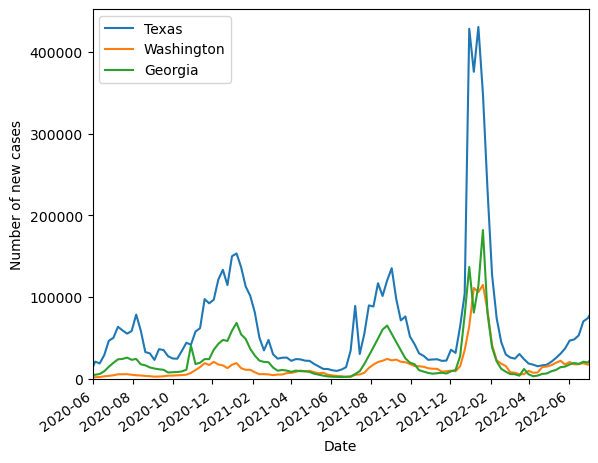

In [4]:
fig, ax = plt.subplots()

plt.plot(covid_tx['start_date'],
         covid_tx['new_cases'],
         label='Texas'
        )

plt.plot(covid_wa['start_date'],
         covid_wa['new_cases'],
         label='Washington'
        )

plt.plot(covid_ga['start_date'],
         covid_ga['new_cases'],
         label='Georgia'
        )

ax.set_ylabel('Number of new cases')
ax.set_xlabel('Date')
plt.xticks(rotation=35,
           ha='right'
          )

ax.set_xlim(pd.to_datetime('05/31/2020'), pd.to_datetime('07/01/2022'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_ylim(0)

ax.legend()

fig.savefig('question_2_plot.pdf', bbox_inches='tight')

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 3</h2>

1pt

Plot a bar plot visualizing the mean number of new cases during the month of August 2020 (using the dates from the <code>'start_date'</code> column) for each: 
<ul>
    <li>Texas</li>
    <li>Washington state</li> 
    <li>Georgia</li> 
</ul>

Your bar plot should contain the following:

<ul>
    <li>Appropriate Y-axis label</li>
    <li>Appropriate X-axis ticks</li>
</ul>

Export your plot as a PDF file. Make sure you have it in your <code>week_1_homework</code> directory as it is part of this assignment submission.

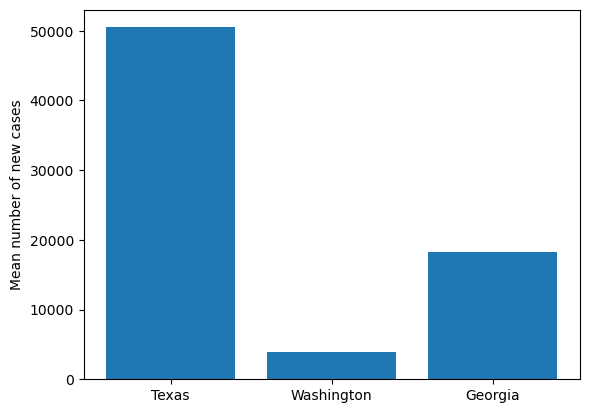

In [5]:
dataset = [covid_tx.loc[(covid_tx['start_date'] > pd.to_datetime('08/01/2020')) & (covid_tx['start_date'] < pd.to_datetime('09/01/2020'))],
           covid_wa.loc[(covid_wa['start_date'] > pd.to_datetime('08/01/2020')) & (covid_wa['start_date'] < pd.to_datetime('09/01/2020'))], 
           covid_ga.loc[(covid_ga['start_date'] > pd.to_datetime('08/01/2020')) & (covid_ga['start_date'] < pd.to_datetime('09/01/2020'))]]
mean_val = np.zeros(3)

for i in np.arange(0, 3, 1):
    mean_val[i] = np.mean(dataset[i]['new_cases'])

fig, ax = plt.subplots()

plt.bar(['Texas', 'Washington', 'Georgia'],
        mean_val
       )

ax.set_ylabel('Mean number of new cases')

fig.savefig('question_3_plot.pdf', bbox_inches='tight')

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 4</h2>

0.5pt

Upload your .csv file for your group's BCA assay from MCB201A your Biology Hub server, and import your file into this notebook as a DataFrame. Tidy up the DataFrame to contain just the raw absorbance measurements for your protein standards only (no unknowns). Update column labels to floats corresponding to the protein concentration in micrograms per microliter.

Output a stylized table of your cleaned up DataFrame below. No exporting needed for this question - just need to output below.

In [6]:
bca = pd.read_csv('G5_BCA.csv',
                  skiprows=23,
                  nrows=2,
                  index_col='Unnamed: 1',
                 )
bca.drop(columns=['Unnamed: 0', '12', 'Unnamed: 14'], inplace=True)

new_names = [2.0, 1.5, 1.0, 0.75, 0.5, 0.25, 0.125, 0.025, 0, 'ctrl', 'ko']

for i, j in zip(bca.columns, new_names):
    bca.rename(columns={i: j}, inplace=True)

bca_standard = bca.loc[:, 2:0]

In [7]:
bca_standard.style

,2.000000,1.500000,1.000000,0.750000,0.500000,0.250000,0.125000,0.025000,0
A,1.060000,0.880000,0.682000,0.538000,0.419000,0.273000,0.209000,0.138000,0.118000
B,1.068000,0.870000,0.660000,0.509000,0.406000,0.267000,0.196000,0.128000,0.117000


<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 5</h2>

1pt

Calculate the mean absorbance for each standard and unknown using your two technical replicates, and correct for background absorbance. 

Add your mean absorbances as a new row with index label <code>'mean'</code> to your DataFrame from Question 4.

Export your updated DataFrame as a .csv file. You can export the index labels as its own column. Make sure you have it in your <code>week_1_homework</code> directory as it is part of this assignment submission.

In [8]:
corr_bca = bca - np.mean(bca.loc[:, 0])

corr_bca.loc['mean', :] = corr_bca.mean()

corr_bca.to_csv('corr_bca.csv')

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 6</h2>

1pt

Create a scatter plot for your BCA assay that plots the protein concentration on the X-axis and the mean corrected absorbance on the Y-axis.

You can use the <code>sns.scatterplot()</code> function. <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html" rel="noopener noreferrer"><u>Documentation for <code>sns.scatterplot()</code> can be found here.</u></a>

Your scatter plot should contain the following:

<ul>
    <li>Appropriate X-axis label with units</li>
    <li>Appropriate Y-axis label</li>
    <li>X-axis and Y-axis with 0 set to the origin</li>
</ul>

Export your scatter plot as a PDF file. Make sure you have it in your <code>week_1_homework</code> directory as it is part of this assignment submission.

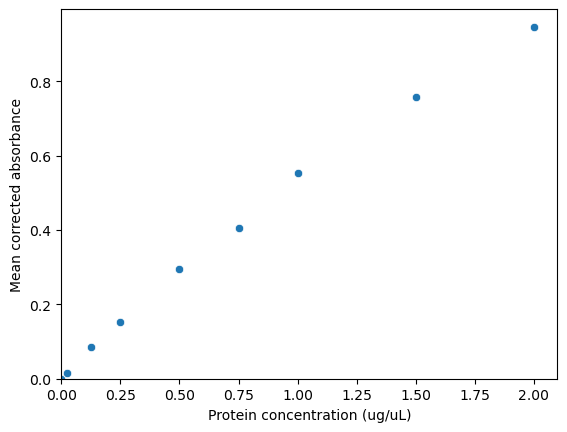

In [9]:
fig, ax = plt.subplots()

sns.scatterplot(data=corr_bca.loc['mean', 2:0])

ax.set_xlabel('Protein concentration (ug/uL)')
ax.set_ylabel('Mean corrected absorbance')

ax.set_xlim(0)
ax.set_ylim(0)

fig.savefig('question_6_plot.pdf', bbox_inches='tight')

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>